# 保険詐欺検出モデル Fraud Detection Model

## 1. 目的と背景
詐欺的な保険請求を検出することで、コスト削減とリスク回避を目指します。

## 2. データの確認・前処理
- データセットの構成・クラス分布の確認  
- 欠損値補完の未実施（欠損が存在しないため）  
- 特徴量削減・選定の省略（今回の分析では対象外）  
- カテゴリ変数へのLabel Encodingの実施

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load CSV file
df = pd.read_csv(r'C:\Users\okada\fraud_oracle.csv')

# Preview the first few rows of the dataset
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [2]:
# Check if any null values exist
print(df.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [3]:
# Check if 'FraudFound_P' contains only 0 and 1
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [4]:
# Check data types of each column
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [5]:
# Extract columns of type 'object', excluding the target column
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Show the list of categorical columns
print("List of categorical columns:")
print(categorical_cols)

List of categorical columns:
['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [6]:
# Encode all categorical columns using LabelEncoder
# We convert to string just in case the column contains mixed types
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Show the encoded result
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


## 3. 単純な決定木
- 単体モデルとしてのベースライン評価  
- クラス不均衡への対応（class_weight）

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# Split the dataset into features and target
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights manually (based on inverse frequency)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model using sample weights
dt_model.fit(X_train, y_train, sample_weight=sample_weights)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model with confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1664 1223]
 [   4  193]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2887
           1       0.14      0.98      0.24       197

    accuracy                           0.60      3084
   macro avg       0.57      0.78      0.48      3084
weighted avg       0.94      0.60      0.70      3084



## 4. ランダムフォレスト
- クラス不均衡への対応(scale_pos_weight)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model with confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2886    1]
 [ 193    4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.80      0.02      0.04       197

    accuracy                           0.94      3084
   macro avg       0.87      0.51      0.50      3084
weighted avg       0.93      0.94      0.91      3084



## 5. XGBoost
- クラス不均衡への対応(scale_pos_weight)
- 閾値最適化(F1-score最大化)

In [13]:
!pip install xgboost

In [34]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Calculate imbalance ratio
negative = sum(y_train == 0)
positive = sum(y_train == 1)
scale = negative / positive

# Train XGBoost model with class weight balancing
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=scale,  # Adjust for class imbalance
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
# Make predictions on test data
y_pred = xgb_model.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2885    2]
 [ 173   24]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.92      0.12      0.22       197

    accuracy                           0.94      3084
   macro avg       0.93      0.56      0.59      3084
weighted avg       0.94      0.94      0.92      3084



## 6. モデル比較（評価指標＋グラフ）

In [36]:
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
}

from sklearn.metrics import (
    roc_auc_score, 
    precision_recall_curve, 
    auc, 
    f1_score, 
    accuracy_score
)
import pandas as pd

# List to store evaluation results
results = []

for name, model in models.items():
    # Predict probabilities and labels
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    y_preds = model.predict(X_test)              # Predicted class labels

    # Calculate evaluation metrics
    roc_auc = roc_auc_score(y_test, y_probs)
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_test, y_preds)
    acc = accuracy_score(y_test, y_preds)

    # Store results
    results.append({
        "Model": name,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "F1-score": f1,
        "Accuracy": acc,
    })

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)
print(df_results)

           Model   ROC AUC    PR AUC  F1-score  Accuracy
0  Decision Tree  0.823696  0.295032  0.239306  0.602140
1  Random Forest  0.864925  0.320597  0.039604  0.937095
2        XGBoost  0.955619  0.611074  0.490765  0.874838


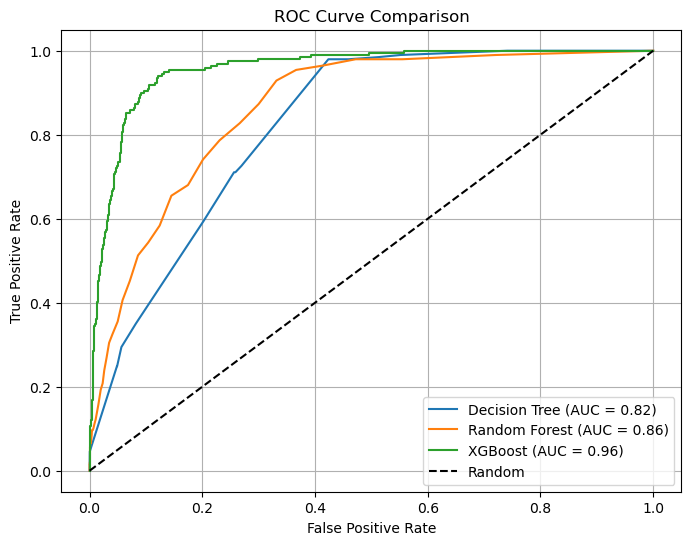

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

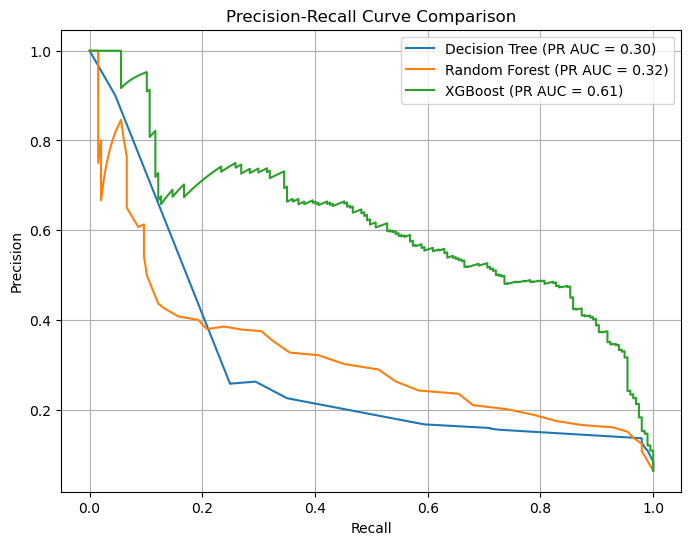

In [26]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


## 7. 最もよかったモデルの最適化
すべてのモデルはデフォルトの閾値（0.5）で評価していますが、  
最も良いパフォーマンスを示したXGBoostに対してのみ、F1スコアを最大化するようにしきい値の最適化を行います。  
これにより、さらに性能を引き上げることができます。

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (class 1)
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # probability of class 1

# === Plot ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# === Plot Precision-Recall (PR) Curve ===
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Create 200 threshold values between 0 and 1
thresholds = np.linspace(0, 1, 200)
f1_scores = []

# Calculate F1-score for each threshold
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Get the threshold that yields the highest F1-score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"★ Maximum F1-score: {best_f1:.4f} (Threshold = {best_threshold:.4f})")

In [ ]:
import matplotlib.pyplot as plt

# Get the threshold that yields the highest F1-score
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs Threshold')
plt.grid()
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.legend()
plt.show()

In [ ]:
# Predict using the best threshold
final_preds = (y_probs >= best_threshold).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix

# Show the confusion matrix with the optimal threshold
conf_matrix = confusion_matrix(y_test, final_preds)
print(conf_matrix)

In [ ]:
from sklearn.metrics import classification_report

# Display detailed classification metrics with optimal threshold
print(classification_report(y_test, final_preds))

In [41]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    precision_recall_curve,
    auc
)
import pandas as pd

# List to store evaluation results
results = []

# === XGBoost with default threshold (0.5) ===
# Predict probabilities for the positive class
y_probs_default = xgb_model.predict_proba(X_test)[:, 1]

# Predict labels using default threshold 0.5
y_preds_default = (y_probs_default >= 0.5).astype(int)

# Calculate precision-recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, y_probs_default)
pr_auc_default = auc(recall, precision)

# Store evaluation metrics
results.append({
    "Model": "XGBoost (default threshold 0.5)",
    "F1-score": f1_score(y_test, y_preds_default),
    "Accuracy": accuracy_score(y_test, y_preds_default),
    "ROC AUC": roc_auc_score(y_test, y_probs_default),
    "PR AUC": pr_auc_default,
})

# === XGBoost with optimized threshold ===
best_thresh = 0.6784  # Replace with your optimized threshold value

# Predict labels using optimized threshold
y_preds_opt = (y_probs_default >= best_thresh).astype(int)

# Recalculate precision-recall curve and PR AUC (same probabilities)
precision, recall, _ = precision_recall_curve(y_test, y_probs_default)
pr_auc_opt = auc(recall, precision)

# Store evaluation metrics
results.append({
    "Model": f"XGBoost (optimized threshold = {best_thresh:.4f})",
    "F1-score": f1_score(y_test, y_preds_opt),
    "Accuracy": accuracy_score(y_test, y_preds_opt),
    "ROC AUC": roc_auc_score(y_test, y_probs_default),  # Same as above
    "PR AUC": pr_auc_opt,
})

# Convert to DataFrame for display
df_results = pd.DataFrame(results)
print(df_results)

                                    Model  F1-score  Accuracy   ROC AUC  \
0         XGBoost (default threshold 0.5)  0.490765  0.874838  0.955619   
1  XGBoost (optimized threshold = 0.6784)  0.609023  0.932555  0.955619   

     PR AUC  
0  0.611074  
1  0.611074  


## 8. 最も良かったモデルの詳細解析
- SHAPによる特徴量重要度
- 個別予測の解釈（optional）
 
ライブラリが未インストールの場合は以下を実行：

pip install shap  
pip install -U scikit-learn

In [27]:
!pip install shap

In [28]:
!pip install -U scikit-learn

In [37]:
import shap

# Initialize the explainer (for tree-based models like XGBoost)
explainer = shap.TreeExplainer(xgb_model)

In [38]:
# Compute SHAP values
shap_values = explainer.shap_values(X_test)

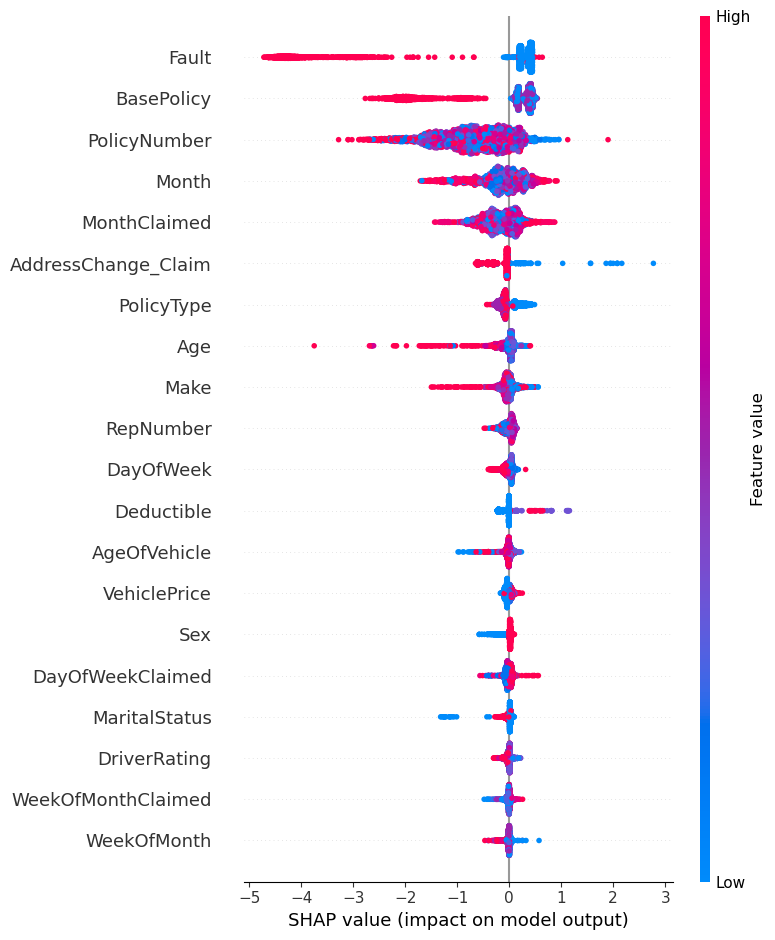

In [31]:
# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

In [32]:
# Force plot for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

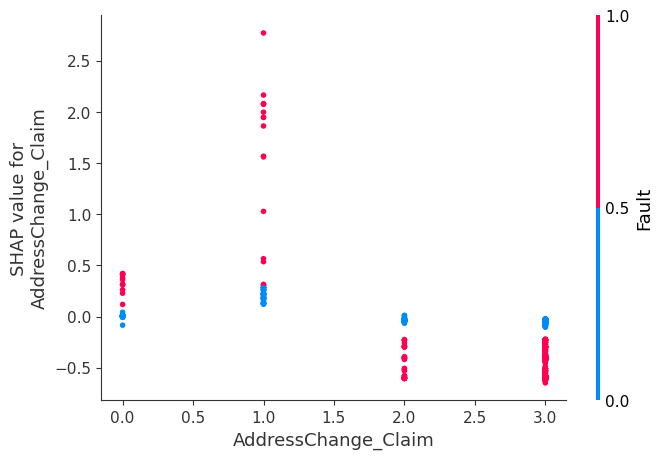

In [33]:
# Distribution of SHAP values for a specific feature
#shap.dependence_plot("feature_name", shap_values, X_test)
shap.dependence_plot("AddressChange_Claim", shap_values, X_test)

## 8. 結論・ビジネス的示唆

詐欺的な保険請求を検出することを目的として、単純な決定木、ランダムフォレスト、XGBoostを用いてモデルを構築した。  
3つのモデルを比較した結果、XGBoostが最も高いパフォーマンスを示したため、しきい値の最適化を行い、さらに精度を向上させたモデルを作成した。

今回の分析により、特徴量の中でも **Fault** と **BasePolicy** が保険詐欺の発生に強く影響していることが明らかとなった。  
最終的なモデルでは **F1-score = 0.61**、**ROC AUC = 0.96** という高い評価指標を達成し、詐欺検出モデルとして十分に実用性のある性能を示した。  
また、モデルに対してSHAPを用いた要因分析を実施し、各特徴量がどの程度詐欺リスクに関与しているかを可視化した。  

ビジネス上の示唆としては、リスクが高いと判断されたユーザに対して重点的な監視を行うことで、詐欺の早期発見・対応を効率化できる可能性がある。  
さらに、リスクスコアをもとに保険料の調整や、低リスクユーザに対するキャンペーン施策なども検討できる。  

今後の分析展開としては、本分析に含まれていない潜在的な要因の導入や、データの偏り（バイアス）の影響を考慮することが今後の課題となる。